## Importing the dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib as nlp
tweets=pd.read_csv('./training.1600000.processed.noemoticon.csv',encoding='latin', 
                   names = ['sentiment','id','date','query','user','tweet'])
tweets

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [38]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (200000, 6)


In [39]:
tweets['sentiment'].unique()

array([0, 4], dtype=int64)

In [40]:
tweets['sentiment']=tweets['sentiment'].replace(4,1)
tweets

,sentiment,id,date,query,user,tweet
156707,0,1956176596,Thu May 28 21:20:15 PDT 2009,NO_QUERY,sweetleafhappy,@Navi_Ganancial I miss the bay area / Sonoma.
769381,0,2301383245,Tue Jun 23 15:22:08 PDT 2009,NO_QUERY,Shelleyhartle,I need new shoes. Everyone wears such mice sho...
789599,0,2325428433,Thu Jun 25 05:25:56 PDT 2009,NO_QUERY,stfany13,Going crasy because i can't find anything for ...
562301,0,2205625866,Wed Jun 17 05:07:59 PDT 2009,NO_QUERY,mikerbrant,@gregjames You should feel bad for such women....
32438,0,1564257558,Mon Apr 20 02:35:14 PDT 2009,NO_QUERY,CarChan,@huangshilin but i wake up late!!! Sorry gal
...,...,...,...,...,...,...
1200534,1,1985508543,Sun May 31 17:14:21 PDT 2009,NO_QUERY,krssy,Over shelli's for the game
1064522,1,1964707968,Fri May 29 14:40:23 PDT 2009,NO_QUERY,Nicolaiov,1ï¿½ teaser do Toy Story 3!! http://bit.ly/3...
965084,1,1827575017,Sun May 17 11:00:08 PDT 2009,NO_QUERY,mcflytomdanny,Uh so bored all I could do is tweet!!!! That'...
1586574,1,2190822685,Tue Jun 16 03:49:29 PDT 2009,NO_QUERY,_trashy,about to go chil in my room I have an amazing...


In [41]:
tweets.drop(['date','query','user'], axis=1, inplace=True)
tweets.drop('id', axis=1, inplace=True)
tweets.head(10)

,sentiment,tweet
156707,0,@Navi_Ganancial I miss the bay area / Sonoma.
769381,0,I need new shoes. Everyone wears such mice sho...
789599,0,Going crasy because i can't find anything for ...
562301,0,@gregjames You should feel bad for such women....
32438,0,@huangshilin but i wake up late!!! Sorry gal
1317491,1,"@martokus aaa yes, Bing. Chandler Bing too sa..."
1034116,1,@brookelovesyoux i haveee no clue. i guess you...
1199108,1,"Annnnd I'm off to work, hopefully I get off ea..."
631931,0,my computer is making weird noises and i don't...
1565192,1,"@biz - I am unemployed, looking for a supply c..."


In [42]:
(tweets.isnull().sum() / len(tweets))*100

sentiment    0.0
tweet        0.0
dtype: float64

In [43]:
#converting pandas object to a string type
tweets['tweet'] = tweets['tweet'].astype('str')

In [44]:
 positives = tweets['sentiment'][tweets.sentiment == 1 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99999
No. of negative tagged sentences is: 100001


In [45]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 
#that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'about', "hasn't", 'how', 'won', 'ourselves', 'by', 'y', 'your', 'not', 'same', 'i', 'there', "aren't", "didn't", "weren't", 'all', 'so', 'if', 'couldn', 'hadn', "hadn't", 'me', 'against', 'few', 'nor', 'yours', 'why', "you've", 'it', 'yourselves', 'below', "needn't", 'too', 'while', 'wasn', "it's", 'both', 'or', 'where', 'him', 'after', 's', 'which', 'as', 'm', 'itself', 'out', 'didn', "mightn't", "she's", 'into', 'had', 'don', 'for', 'this', 'any', 'that', 'have', 'o', 'other', 'now', 'isn', 'during', 'more', 'above', 'he', 'of', 'just', 'weren', 'a', 'they', "you'd", 'from', 'shouldn', 'hers', 've', 'd', 'my', 'such', 'been', 'her', 'ours', 'was', 'but', 'mightn', 'has', 'you', 'hasn', 'shan', 'between', "shouldn't", "wasn't", 'on', 'himself', 'do', 'ma', 'will', "haven't", 'with', 'we', 'no', "don't", 'should', "doesn't", 'only', 'ain', 'when', 'what', 'own', "that'll", 'until', 'to', 'needn', 'themselves', 'doing', 'does', 'the', 'am', 'further', 'wouldn', 'once', "wouldn't", 'th

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaswanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'
def process_tweets(tweet):
  # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [47]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [48]:
def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)  

In [49]:
tweets['processed_tweets'] = tweets['tweet'].apply(lambda x: process_tweets(x))
tweets['processed_tweets'] = tweets['processed_tweets'].apply(lambda x: convert_abbrev_in_text(x))
print('Text Preprocessing complete.')
tweets

Text Preprocessing complete.


,sentiment,tweet,processed_tweets
156707,0,@Navi_Ganancial I miss the bay area / Sonoma.,naviganancial miss bay area sonoma
769381,0,I need new shoes. Everyone wears such mice sho...,need new shoe everyone wear mouse shoe except
789599,0,Going crasy because i can't find anything for ...,oing crasy find anything pool party megans fault
562301,0,@gregjames You should feel bad for such women....,gregjames feel bad woman imagine would comfort...
32438,0,@huangshilin but i wake up late!!! Sorry gal,huangshilin wake late sorry get a life
...,...,...,...
1200534,1,Over shelli's for the game,ver shellis game
1064522,1,1ï¿½ teaser do Toy Story 3!! http://bit.ly/3...,ï¿½ teaser toy story
965084,1,Uh so bored all I could do is tweet!!!! That'...,bored could tweet intersting thing im
1586574,1,about to go chil in my room I have an amazing...,about go chil room amazing boyfriend gtlt


In [50]:
#removing shortwords
tweets['processed_tweets']=tweets['processed_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,sentiment,tweet,processed_tweets
156707,0,@Navi_Ganancial I miss the bay area / Sonoma.,naviganancial miss area sonoma
769381,0,I need new shoes. Everyone wears such mice sho...,need shoe everyone wear mouse shoe except
789599,0,Going crasy because i can't find anything for ...,oing crasy find anything pool party megans fault
562301,0,@gregjames You should feel bad for such women....,gregjames feel woman imagine would comfortable...
32438,0,@huangshilin but i wake up late!!! Sorry gal,huangshilin wake late sorry life


## Splitting the dataset in train and test split

In [60]:
from sklearn.model_selection import train_test_split
X=tweets['processed_tweets']
y=tweets['sentiment']
df_train,df_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)


DF Train Shape:  (134000,)
DF Test Shape:  (66000,)
Y Train Shape:  (134000,)
Y Test Shape:  (66000,)


## Building deep learn model

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [62]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 121218 number of independent tokens


In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(134000, 23)

In [64]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(66000, 23)

In [65]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [67]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 23)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 23, 20)            2424380   
                                                                 
 conv1d_6 (Conv1D)           (None, 21, 32)            1952      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 64)             6208      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                         

## Training the model

In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)


Epoch 1/5
1340/1340 [==============================] - 38s 27ms/step - loss: 0.5857 - accuracy: 0.6915 - val_loss: 0.5226 - val_accuracy: 0.7375
Epoch 2/5
1340/1340 [==============================] - 36s 27ms/step - loss: 0.4876 - accuracy: 0.7638 - val_loss: 0.5182 - val_accuracy: 0.7403
Epoch 3/5
1340/1340 [==============================] - 36s 27ms/step - loss: 0.4511 - accuracy: 0.7871 - val_loss: 0.5347 - val_accuracy: 0.7339
Epoch 4/5
1340/1340 [==============================] - 36s 27ms/step - loss: 0.4105 - accuracy: 0.8112 - val_loss: 0.5779 - val_accuracy: 0.7230
Epoch 5/5
1340/1340 [==============================] - 37s 27ms/step - loss: 0.3653 - accuracy: 0.8372 - val_loss: 0.6183 - val_accuracy: 0.7228


In [69]:
y_pred=model.predict(data_test)
y_pred

2063/2063 [==============================] - 5s 2ms/step


array([[8.6967343e-01, 1.3032325e-01, 9.9431156e-07, 1.3888183e-06,
        8.9064514e-07],
       [1.2942567e-01, 8.7056649e-01, 2.5721565e-06, 2.9295995e-06,
        2.4204896e-06],
       [9.7351980e-01, 2.6480099e-02, 2.9716292e-08, 4.4888882e-08,
        2.4664304e-08],
       ...,
       [9.8272574e-01, 1.7274261e-02, 2.4456805e-08, 3.1426531e-08,
        1.6797649e-08],
       [4.5372823e-01, 5.4612648e-01, 4.3373151e-05, 5.2967178e-05,
        4.8864393e-05],
       [1.1286515e-01, 8.8713485e-01, 8.8641086e-09, 9.8892308e-09,
        4.3394284e-09]], dtype=float32)

In [70]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

## Scoring 

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

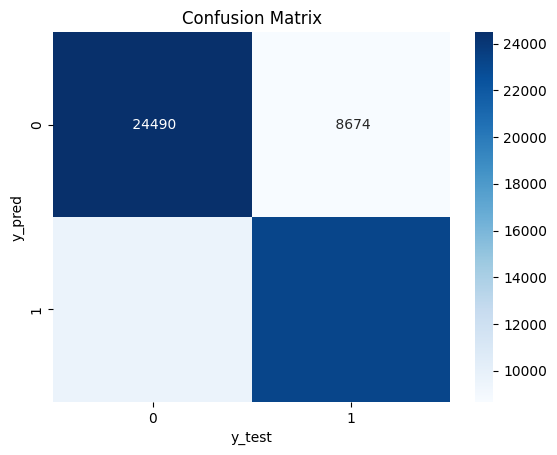

In [72]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     33164
           1       0.73      0.71      0.72     32836

    accuracy                           0.72     66000
   macro avg       0.72      0.72      0.72     66000
weighted avg       0.72      0.72      0.72     66000

